In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N_SIZE = 100000
P = np.random.normal(loc=0, scale=1, size=N_SIZE)
Q = np.random.normal(loc=1, scale=1, size=N_SIZE)

(array([   47.,   622.,  4103., 14778., 28564., 29555., 16436.,  5004.,
          804.,    87.]),
 array([-3.08571825, -2.27936057, -1.47300288, -0.66664519,  0.13971249,
         0.94607018,  1.75242787,  2.55878555,  3.36514324,  4.17150093,
         4.97785861]),
 <BarContainer object of 10 artists>)

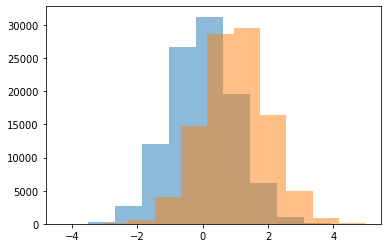

In [3]:
fig, ax = plt.subplots(1)
ax.hist(P, alpha=0.5)
ax.hist(Q, alpha=0.5)

In [6]:
def cum_count(arr):
    sorted_arr = sorted(arr)
    counts = np.zeros(len(arr))
    rolling_count = 0
    
    for idx, elem in enumerate(sorted_arr):
        rolling_count += 1
        counts[idx] = rolling_count
        
    counts /= len(counts)
    return (sorted_arr, counts)

def cum_count_reduced(arr):
    sorted_arr = np.array(sorted(arr))
    counts = np.zeros(len(arr))
    rolling_count = 0
    
    for idx, elem in enumerate(sorted_arr):
        rolling_count += 1
        counts[idx] = rolling_count
        
    counts /= len(counts)
    counts -= (1 / (2 * len(counts)))
    return (sorted_arr, counts)

In [7]:
sorted_P, count_P = cum_count(P)
sorted_P_reduced, count_P_reduced = cum_count_reduced(P)

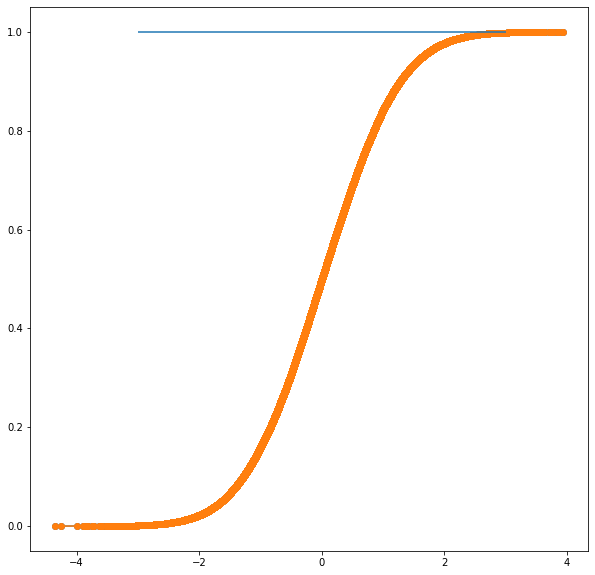

In [8]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.plot(sorted_P, count_P, marker='o')
ax.plot(sorted_P_reduced, count_P_reduced, marker='o')
ax.hlines(1, -3, 3)

In [9]:
from scipy.interpolate import interp1d

In [10]:
f = interp1d(sorted_P_reduced, count_P_reduced)

In [11]:
x_new = np.linspace(-2, 0, 100)
y_new = f(x_new)

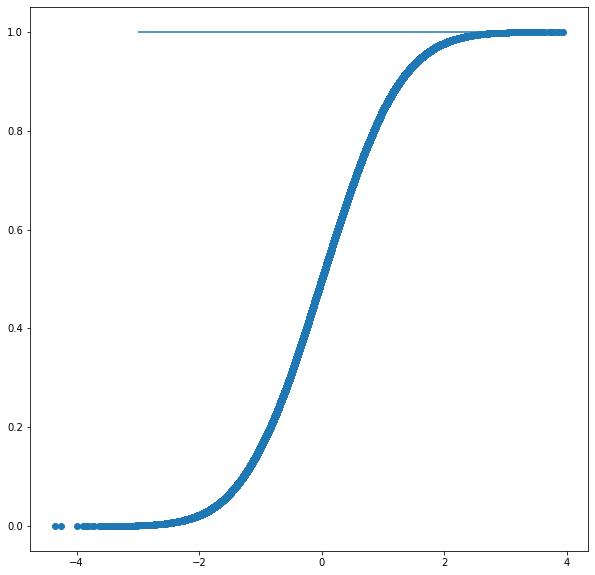

In [12]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.plot(x_new, y_new)
ax.scatter(sorted_P_reduced, count_P_reduced, marker='o')
ax.hlines(1, -3, 3)

In [13]:
eps = 1e-6

In [14]:
X = sorted_P_reduced
X_lag = sorted_P_reduced - eps

X_inter = f(X[1:])
X_lag_interp = f(X_lag[1:])

Delta_P = (X_inter - X_lag_interp)

In [28]:
def cumcount_reduced(arr):
    sorted_arr = np.array(arr)
    counts = np.zeros(len(arr))
    
    rolling_count = 0
    for idx, elem in enumerate(sorted_arr):
        rolling_count += 1
        counts[idx] = rolling_count

    counts /= len(counts)
    counts -= (1 / (2 * len(counts)))

    return (sorted_arr, counts)

def kl_div(P, Q, eps=1e-10):
    P = sorted(P)
    Q = sorted(Q)
    
    P_positions, P_counts = cumcount_reduced(P)
    Q_positions, Q_counts = cumcount_reduced(Q)
    
    f_P = interp1d(P_positions, P_counts)
    f_Q = interp1d(Q_positions, Q_counts)
    
    x_min = np.max([P_positions[1], Q_positions[1]])
    x_max= np.min([P_positions[-1], Q_positions[-1]])
    
    X = np.array( [x for x in P_positions if ((x >= x_min) & (x <= x_max))] )
    values = (f_P(X) - f_P(X-eps))  / (f_Q(X) - f_Q(X-eps))
    out = np.sum(np.log(values[values > 0]))
    out /= len(X)
    out -= 1.
    return out

In [29]:
P = np.random.normal(loc=0.3, scale=1, size=1000000).astype(np.float64)
Q = np.random.normal(loc=1, scale=2, size=1000000).astype(np.float64)
kl_div(P, Q, eps=1e-14)

<ipython-input-28-5d9f160689f1>:29: RuntimeWarning: invalid value encountered in true_divide
  values = (f_P(X) - f_P(X-eps))  / (f_Q(X) - f_Q(X-eps))


0.38652271257683246

In [30]:
outputs = []
sizes = range(10, 10000, 10)
for size in sizes:
    P = np.random.normal(loc=0.3, scale=1, size=size)
    Q = np.random.normal(loc=1, scale=2, size=size)
    outputs.append(get_delta(P, Q))

In [31]:
outputs[-1]

0.3835358184030013

In [41]:
100 * np.logspace(0.1, 1, 100, endpoint=True)

array([ 125.89254118,  128.55557319,  131.27493689,  134.05182388,
        136.88745095,  139.78306066,  142.73992182,  145.7593301 ,
        148.84260857,  151.9911083 ,  155.20620891,  158.48931925,
        161.84187792,  165.26535399,  168.76124758,  172.33109056,
        175.9764472 ,  179.69891485,  183.50012467,  187.38174229,
        191.3454686 ,  195.39304047,  199.5262315 ,  203.7468528 ,
        208.05675382,  212.4578231 ,  216.95198915,  221.54122126,
        226.22753038,  231.01297001,  235.89963707,  240.88967285,
        245.98526393,  251.18864315,  256.50209057,  261.92793448,
        267.46855244,  273.12637228,  278.9038732 ,  284.80358684,
        290.8280984 ,  296.98004774,  303.26213059,  309.67709969,
        316.22776602,  322.91699999,  329.74773278,  336.72295752,
        343.84573069,  351.11917342,  358.54647285,  366.13088354,
        373.8757289 ,  381.78440264,  389.86037025,  398.10717055,
        406.52841719,  415.12780028,  423.90908796,  432.87612

In [44]:
[500 + 1000 * i for i in range(30)]

[500,
 1500,
 2500,
 3500,
 4500,
 5500,
 6500,
 7500,
 8500,
 9500,
 10500,
 11500,
 12500,
 13500,
 14500,
 15500,
 16500,
 17500,
 18500,
 19500,
 20500,
 21500,
 22500,
 23500,
 24500,
 25500,
 26500,
 27500,
 28500,
 29500]

In [48]:
import time

In [51]:
%%time

n_runs = 1000
n_simulations = 30
simulation_sizes = [500 + 1000 * i for i in range(n_simulations)]


execution_times = []
results = []
result_std = []

for size in simulation_sizes:
    print(size)
    start = time.time()
    current_sim_results = []
    for sim in range(n_runs):
        P = np.random.normal(loc=0.3, scale=1, size=size)
        Q = np.random.normal(loc=1, scale=2, size=size)
        current_sim_results.append(get_delta(P, Q))

    results.append(np.mean(current_sim_results))
    result_std.append(np.std(current_sim_results)) 
    execution_times.append(time.time() - start)

500
1500
2500
3500
4500
5500
6500
7500
8500
9500
10500
11500
12500
13500
14500
15500
16500
17500
18500
19500
20500
21500
22500
23500
24500
25500
26500
27500
28500
29500
CPU times: user 6min 25s, sys: 1.38 s, total: 6min 26s
Wall time: 6min 26s


In [55]:
results = np.array(results)
result_std = np.array(result_std)

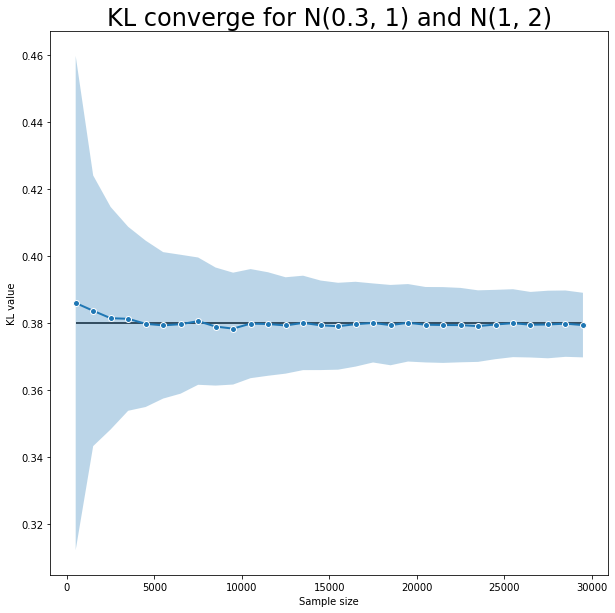

In [68]:
fig, ax = plt.subplots(1, figsize=(10,10))
positions = list(range(len(results)))
ax.plot(simulation_sizes, results, lw=2, marker='o', mec='white')
ax.fill_between(simulation_sizes, results + result_std, results - result_std, alpha=0.3)

ax.set_title('KL converge for N(0.3, 1) and N(1, 2)', fontsize=24)
ax.set_ylabel('KL value')
ax.set_xlabel('Sample size')
ax.hlines(0.38, simulation_sizes[0], simulation_sizes[-1], color='black', alpha=1, zorder=-1)
plt.show()

Text(0, 0.5, 'KL calculation time (s)')

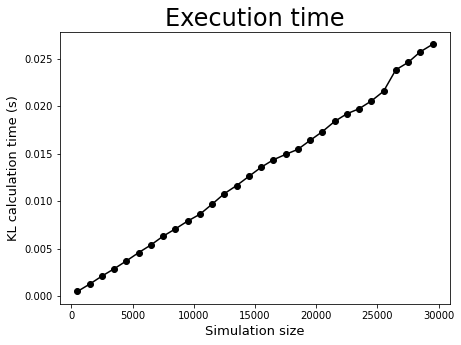

In [76]:
fig, ax = plt.subplots(1, figsize=(7, 5))

ax.plot(
    simulation_sizes,
    np.array(execution_times) / n_runs,
    color='black',
    marker='o',
)

ax.set_title('Execution time', fontsize=24)
ax.set_xlabel('Simulation size', fontsize=13)
ax.set_ylabel('KL calculation time (s)', fontsize=13)


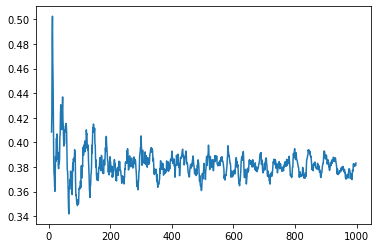

In [37]:
s = pd.Series(outputs)

plt.plot(s.rolling(10).mean())